This code shows how to automatize charts of Brent spot price and Dollar weighted index using quandl API

In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import quandl 
from datetime import date,timedelta

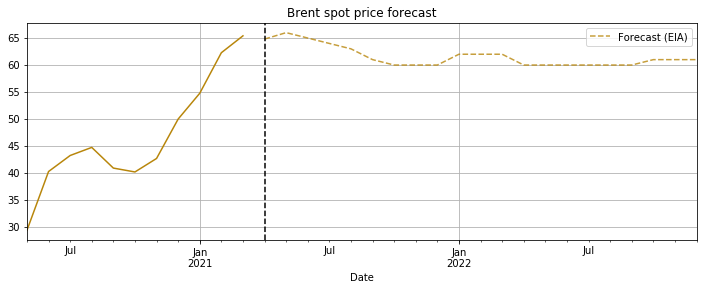

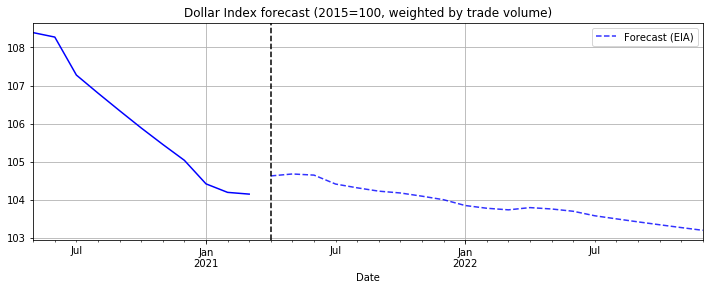

In [2]:
quandl.ApiConfig.api_key = 'Your key'    #Insert your Quandl key


#The forecast should start in actual month, as actual month is already the forecasted one
#That means that the last date with historical data is the last month, that is reason for -30 days

last_historical_data = (date.today()-timedelta(days=30)).isoformat()    

year_before = (date.today()-timedelta(days=(365))).isoformat()     #Lenght of the historical data


brent_eia=quandl.get('EIA/STEO_BREPUUS_M', start_date=year_before)    #Download data



#This part creates the chart with Brent

brent_eia['Value'][:last_historical_data].plot(figsize=(12,4),
                                      title="Brent spot price forecast",legend=False,color="darkgoldenrod",grid=True)
brent_eia['Value'][last_historical_data:].plot(legend=True,color="darkgoldenrod",
                                               alpha=0.8,linestyle="--",grid=True,label="Forecast (EIA)")
pyplot.axvline(x=last_historical_data, color="black",linestyle="--")
pyplot.show()



#This part do the same for Dollar index

dollar_eia=quandl.get('EIA/STEO_FOREX_WORLD_M', start_date=year_before)
dollar_eia_forecast=quandl.get('EIA/STEO_FOREX_WORLD_M', start_date=year_before)

dollar_eia['Value'][:last_historical_data].plot(figsize=(12,4),color="blue",
                         title="Dollar Index forecast (2015=100, weighted by trade volume)",legend=False)
dollar_eia['Value'][last_historical_data:].plot(color="blue",alpha=0.8,
                                                linestyle="--",label="Forecast (EIA)",legend=True,grid=True)
pyplot.axvline(x=last_historical_data, color="black",linestyle="--")
pyplot.show()

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services. Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, author has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, freely availible at the time of publication. Author makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.